In [1]:
%pylab inline

import os.path as op
import sys
import matplotlib.pyplot as plt
import glob

import io3d
import sed3
import scipy


sys.path.insert(0, op.expanduser("~/projects/bodynavigation"))

import bodynavigation
pt = op.expanduser("~/projects/imtools")
sys.path.append(pt)
import imtools
# reload(imtools)

Populating the interactive namespace from numpy and matplotlib


In [2]:
sliver_reference_dir = op.expanduser("~/data/medical/orig/sliver07/training/")
train_pattern = "*[0-6].mhd"
test_pattern = "*[7-9].mhd"
train_pattern = "*[0-2].mhd"
test_pattern = "*[9].mhd"

## Train

Prepare function to calculate feature vector from 3D to [1D x number_of_features]

In [3]:
def localization_fv_intensity(data3d, voxelsize_mm):        # scale
        fv = []
        f0 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=3).reshape(-1, 1)
        #f1 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=1).reshape(-1, 1) - f0
        #f2 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=5).reshape(-1, 1) - f0
        #f3 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=10).reshape(-1, 1) - f0
        #f4 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=20).reshape(-1, 1) - f0
        # position asdfas
        import bodynavigation as bn
        # ss = bn.BodyNavigation(data3d, voxelsize_mm)
        # fd1 = ss.dist_to_lungs().reshape(-1, 1)
        # fd2 = ss.dist_to_spine().reshape(-1, 1)
        # fd3 = ss.dist_sagittal().reshape(-1, 1)
        # fd4 = ss.dist_coronal().reshape(-1, 1)
        # fd5 = ss.dist_axial().reshape(-1, 1)
        # fd6 = ss.dist_to_surface().reshape(-1, 1)
        # fd7 = ss.dist_diaphragm().reshape(-1, 1)

        # f6 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[20, 1, 1]).reshape(-1, 1) - f0
        # f7 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[1, 20, 1]).reshape(-1, 1) - f0
        # f8 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[1, 1, 20]).reshape(-1, 1) - f0

        # print "fv shapes ", f0.shape, fd2.shape, fd3.shape
        fv = np.concatenate([
                f0,
#                 f1, f2, f3, f4,
          #      fd1, fd2, fd3, fd4, fd5, fd6, fd7,
                #f6, f7, f8
            ], 1)


        return fv

In [4]:
def localization_fv_navigation(data3d, voxelsize_mm):        # scale
        fv = []
        # f0 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=3).reshape(-1, 1)
        #f1 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=1).reshape(-1, 1) - f0
        #f2 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=5).reshape(-1, 1) - f0
        #f3 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=10).reshape(-1, 1) - f0
        #f4 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=20).reshape(-1, 1) - f0
        # position asdfas
        import bodynavigation as bn
        ss = bn.BodyNavigation(data3d, voxelsize_mm)
        fd1 = ss.dist_to_lungs().reshape(-1, 1)
        fd2 = ss.dist_to_spine().reshape(-1, 1)
        fd3 = ss.dist_sagittal().reshape(-1, 1)
        fd4 = ss.dist_coronal().reshape(-1, 1)
        fd5 = ss.dist_axial().reshape(-1, 1)
        fd6 = ss.dist_to_surface().reshape(-1, 1)
        fd7 = ss.dist_diaphragm().reshape(-1, 1)

        # f6 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[20, 1, 1]).reshape(-1, 1) - f0
        # f7 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[1, 20, 1]).reshape(-1, 1) - f0
        # f8 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[1, 1, 20]).reshape(-1, 1) - f0

        # print "fv shapes ", f0.shape, fd2.shape, fd3.shape
        fv = np.concatenate([
          #      f0,
#                 f1, f2, f3, f4,
                fd1, fd2, fd3, fd4, fd5, fd6, fd7,
                #f6, f7, f8
            ], 1)


        return fv

In [5]:
def localization_fv_navigation_intensity(data3d, voxelsize_mm):        # scale
        fv = []
        f0 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=3).reshape(-1, 1)
        #f1 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=1).reshape(-1, 1) - f0
        #f2 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=5).reshape(-1, 1) - f0
        #f3 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=10).reshape(-1, 1) - f0
        #f4 = scipy.ndimage.filters.gaussian_filter(data3dr, sigma=20).reshape(-1, 1) - f0
        # position asdfas
        import bodynavigation as bn
        ss = bn.BodyNavigation(data3d, voxelsize_mm)
        fd1 = ss.dist_to_lungs().reshape(-1, 1)
        fd2 = ss.dist_to_spine().reshape(-1, 1)
        fd3 = ss.dist_sagittal().reshape(-1, 1)
        fd4 = ss.dist_coronal().reshape(-1, 1)
        fd5 = ss.dist_axial().reshape(-1, 1)
        fd6 = ss.dist_to_surface().reshape(-1, 1)
        fd7 = ss.dist_diaphragm().reshape(-1, 1)

        # f6 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[20, 1, 1]).reshape(-1, 1) - f0
        # f7 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[1, 20, 1]).reshape(-1, 1) - f0
        # f8 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=[1, 1, 20]).reshape(-1, 1) - f0

        # print "fv shapes ", f0.shape, fd2.shape, fd3.shape
        fv = np.concatenate([
                f0,
#                 f1, f2, f3, f4,
                fd1, fd2, fd3, fd4, fd5, fd6, fd7,
                #f6, f7, f8
            ], 1)


        return fv

# Intensity model

## Training

In [6]:
import imtools.trainer3d
import imtools.datasets
ol = imtools.trainer3d.Trainer3D()
ol.feature_function = localization_fv_intensity

for one in imtools.datasets.sliver_reader(
    train_pattern,  
    read_seg=True,
    sliver_reference_dir=sliver_reference_dir):
    
    numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
    ol.add_train_data(orig_data, ref_data, voxelsize_mm=vs_mm)
    
ol.fit()

/Users/mjirik/miniconda/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


## Testing

(140, 255, 255)
(9103500,)


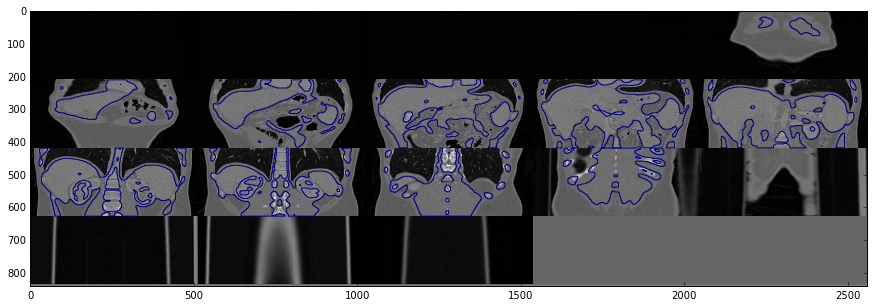

(156, 209, 209)
(6814236,)


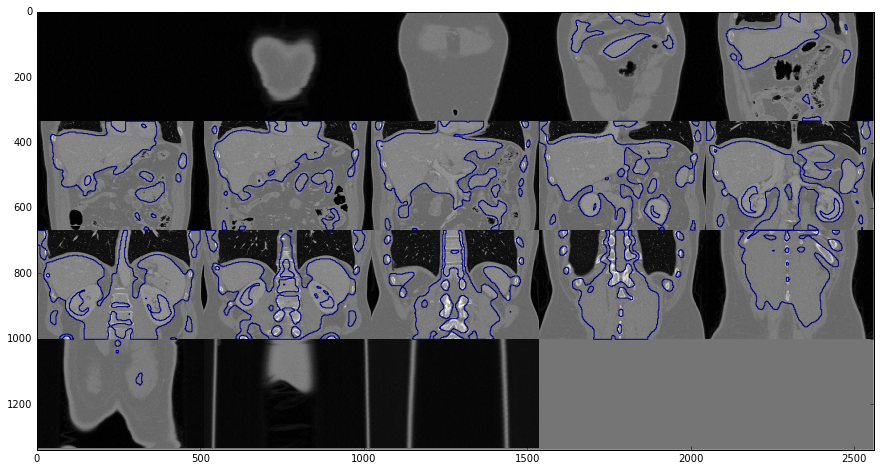

,err1_percent,voe,vd,volume1_mm3,sliver_vd_pts,sliver_avgd_pts,err1_mm3,sliver_rmsd_pts,sliver_overall_pts,rmsd,avgd,err2_mm3,sliver_voe_pts,sliver_maxd_pts,volume2_mm3,maxd,err2_percent
0,2.930545,56.625420,231.917630,1.620316e+06,0.0,0.0,102546.099138,0.0,0.0,4702.575838,49.873160,3.860345e+06,0.0,0.0,5.378115e+06,264.616411,110.320295
1,2.380683,55.943848,230.692569,1.544696e+06,0.0,0.0,79192.110615,0.0,0.0,4221.112375,48.946894,3.642690e+06,0.0,0.0,5.108194e+06,182.824373,109.507012


In [7]:
lst = list(imtools.datasets.sliver_reader(test_pattern, read_seg=True))
import pandas as pd

df1 = None
for one in lst:
    numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
    fit = ol.predict(orig_data, voxelsize_mm=vs_mm)
    plt.figure(figsize=(15,10))
    plt.axis("off")
    sed3.show_slices(orig_data, fit, slice_step=30, axis=1, flipV=True)
    import lisa.volumetry_evaluation
    ev = lisa.volumetry_evaluation.compare_volumes_sliver(ref_data, fit, vs_mm)
    
    if df1 is None:
        df1 = pd.DataFrame([ev.values()], columns=ev.keys())
    else:
        df1.loc[len(df1)] = ev
df1

In [8]:
df_intensity = df1

# Body navigation

## Training

In [9]:
import imtools.trainer3d
import imtools.datasets
ol = imtools.trainer3d.Trainer3D()
ol.feature_function = localization_fv_navigation

for one in imtools.datasets.sliver_reader(
    train_pattern, read_seg=True,
    sliver_reference_dir=sliver_reference_dir):
    
    numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
    ol.add_train_data(orig_data, ref_data, voxelsize_mm=vs_mm)
    
ol.fit()

/Users/mjirik/projects/bodynavigation/bodynavigation/body_navigation.py:628: RuntimeWarning: invalid value encountered in greater
  med = np.median(profile[profile > 0])
/Users/mjirik/projects/bodynavigation/bodynavigation/body_navigation.py:629: RuntimeWarning: invalid value encountered in greater
  profile[np.abs(profile - med) > tolerance] = 0
/Users/mjirik/miniconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/mjirik/projects/bodynavigation/bodynavigation/body_navigation.py:736: RuntimeWarning: invalid value encountered in greater
  too_bad_pixels = np.abs(flat_out - flat) > (max_dist_mm/self.working_vs[0])


## Testing

(140, 255, 255)
(9103500,)


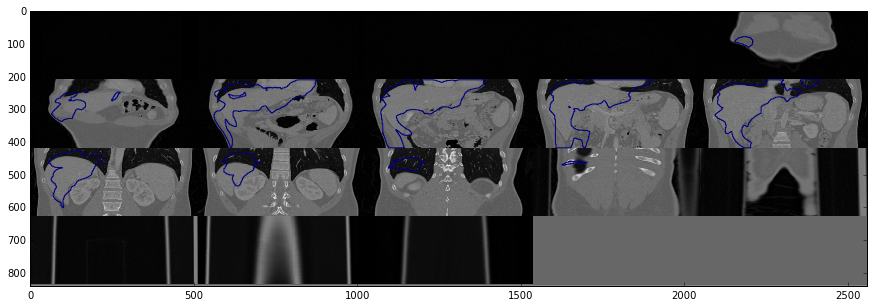

(156, 209, 209)
(6814236,)


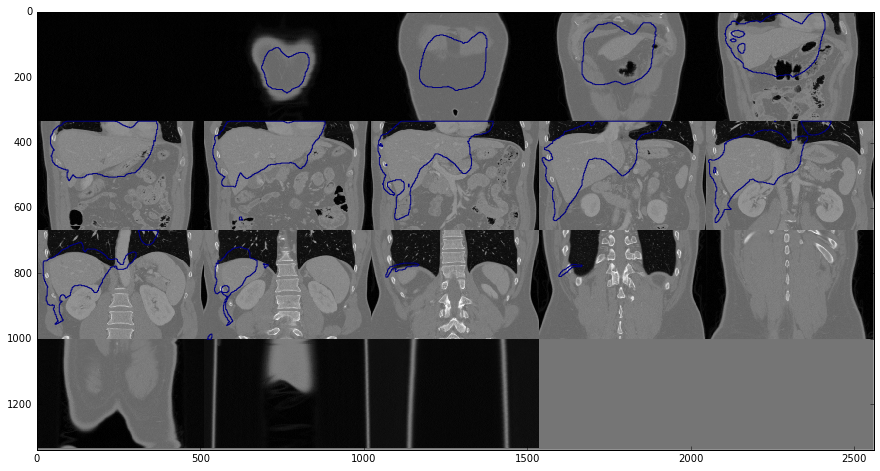

,err1_percent,voe,vd,volume1_mm3,sliver_vd_pts,sliver_avgd_pts,err1_mm3,sliver_rmsd_pts,sliver_overall_pts,rmsd,avgd,err2_mm3,sliver_voe_pts,sliver_maxd_pts,volume2_mm3,maxd,err2_percent
0,18.495811,33.427175,35.104277,1.620316e+06,0.0,0.0,352292.704295,0.0,4.004793,203.643274,10.683899,9.210930e+05,0.0,20.023965,2.189116e+06,60.781787,48.358540
1,8.319053,41.590140,99.720152,1.544696e+06,0.0,0.0,192576.260109,0.0,0.000000,498.049980,16.567950,1.732949e+06,0.0,0.000000,3.085068e+06,90.324606,74.861227


In [10]:
lst = list(imtools.datasets.sliver_reader(test_pattern, read_seg=True))
import pandas as pd

df1 = None
for one in lst:
    numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
    fit = ol.predict(orig_data, voxelsize_mm=vs_mm)
    plt.figure(figsize=(15,10))
    plt.axis("off")
    sed3.show_slices(orig_data, fit, slice_step=30, axis=1, flipV=True)
    import lisa.volumetry_evaluation
    ev = lisa.volumetry_evaluation.compare_volumes_sliver(ref_data, fit, vs_mm)
    
    if df1 is None:
        df1 = pd.DataFrame([ev.values()], columns=ev.keys())
    else:
        df1.loc[len(df1)] = ev
df1

In [11]:
df_navigation = df1

# Body navigation + intensity

## Training

In [12]:
import imtools.trainer3d
import imtools.datasets
ol = imtools.trainer3d.Trainer3D()
ol.feature_function = localization_fv_navigation_intensity

for one in imtools.datasets.sliver_reader(
    train_pattern, read_seg=True,
    sliver_reference_dir=sliver_reference_dir):
    
    numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
    ol.add_train_data(orig_data, ref_data, voxelsize_mm=vs_mm)
    
ol.fit()

(140, 255, 255)
(9103500,)


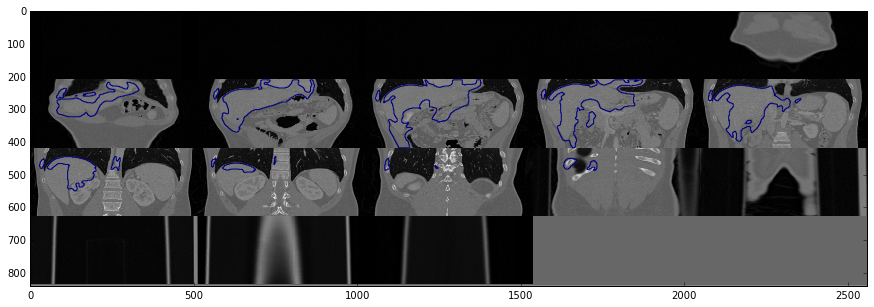

(156, 209, 209)
(6814236,)


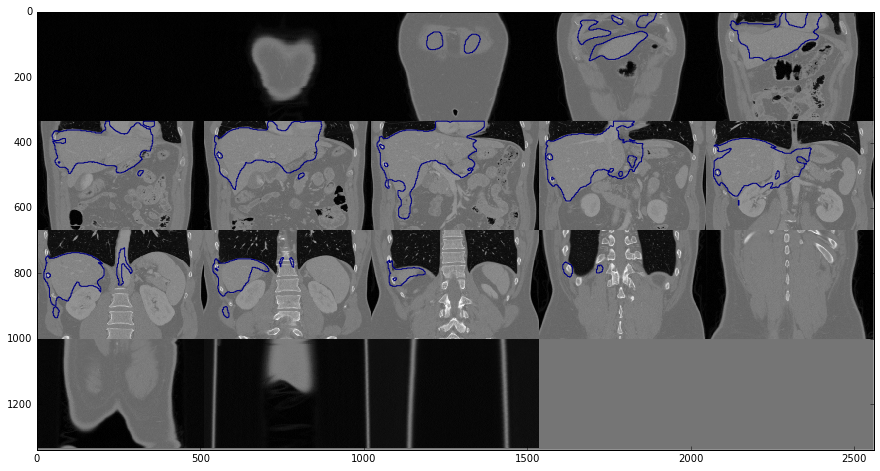

,err1_percent,voe,vd,volume1_mm3,sliver_vd_pts,sliver_avgd_pts,err1_mm3,sliver_rmsd_pts,sliver_overall_pts,rmsd,avgd,err2_mm3,sliver_voe_pts,sliver_maxd_pts,volume2_mm3,maxd,err2_percent
0,28.854956,32.082138,6.669605,1.620316e+06,73.946855,0.0,483133.083434,0.0,21.444316,245.984447,10.960867,591201.769125,0.0,33.274723,1.728385e+06,50.711210,35.309321
1,10.876591,25.679231,34.749056,1.544696e+06,0.000000,0.0,197201.210801,0.0,5.103006,197.134130,9.766377,733968.347122,0.0,25.515028,2.081463e+06,56.608579,40.481870


In [13]:
lst = list(imtools.datasets.sliver_reader(test_pattern, read_seg=True))
import pandas as pd

df1 = None
for one in lst:
    numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
    fit = ol.predict(orig_data, voxelsize_mm=vs_mm)
    plt.figure(figsize=(15,10))
    plt.axis("off")
    sed3.show_slices(orig_data, fit, slice_step=30, axis=1, flipV=True)
    import lisa.volumetry_evaluation
    ev = lisa.volumetry_evaluation.compare_volumes_sliver(ref_data, fit, vs_mm)
    
    if df1 is None:
        df1 = pd.DataFrame([ev.values()], columns=ev.keys())
    else:
        df1.loc[len(df1)] = ev
df1

In [14]:

df_navigation_intensity = df1

# Evaluation

In [15]:

rn = {"voe":"VOE [%]", "vd": "VD [%]", "rmsd": "RMSD [mm]", "maxd": "MaxD [mm]", "avgd": "AvgD [mm]"}
df_intensity[["voe", "vd", "rmsd", "avgd", "maxd"]].rename(columns=rn)



,VOE [%],VD [%],RMSD [mm],AvgD [mm],MaxD [mm]
0,56.625420,231.917630,4702.575838,49.873160,264.616411
1,55.943848,230.692569,4221.112375,48.946894,182.824373


In [16]:

df_navigation[["voe", "vd", "rmsd", "avgd", "maxd"]].rename(columns=rn)

,VOE [%],VD [%],RMSD [mm],AvgD [mm],MaxD [mm]
0,33.427175,35.104277,203.643274,10.683899,60.781787
1,41.590140,99.720152,498.049980,16.567950,90.324606


In [20]:
df1 = df_intensity[["voe", "vd", "rmsd", "avgd", "maxd"]].mean()
df2 = df_navigation[["voe", "vd", "rmsd", "avgd", "maxd"]].mean()
df3 = df_navigation_intensity[["voe", "vd", "rmsd", "avgd", "maxd"]].mean()
dfall = pd.DataFrame([df1, df2, df3], 
                     # index=["Intensity", "Body Navigation", "Body Navigation + Intensity"]
                     index=["I", "BN", "BN+I"]
                    ).rename(columns=rn)
dfall

,VOE [%],VD [%],RMSD [mm],AvgD [mm],MaxD [mm]
I,56.284634,231.305099,4461.844107,49.410027,223.720392
BN,37.508658,67.412215,350.846627,13.625924,75.553196
BN+I,28.880685,20.709331,221.559289,10.363622,53.659895


In [19]:
print dfall.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &    VOE [\%] &      VD [\%] &    RMSD [mm] &  AvgD [mm] &   MaxD [mm] \\
\midrule
Intensity                   &  56.284634 &  231.305099 &  4461.844107 &  49.410027 &  223.720392 \\
Body Navigation             &  37.508658 &   67.412215 &   350.846627 &  13.625924 &   75.553196 \\
Body Navigation + Intensity &  28.880685 &   20.709331 &   221.559289 &  10.363622 &   53.659895 \\
\bottomrule
\end{tabular}

